In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [2]:

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
    r'C:\Users\vickj\Documents\Computer Vision_Sem2_Mtech\NigntFlare_Removal_MIPI\FlareReal800_2k train dataset',
    target_size=(64, 64),
    batch_size=32,
    class_mode='input',  # 'input' because input and output are the same for flare removal
    color_mode='rgb'
) 

test_set = datagen.flow_from_directory(
    r'C:\Users\vickj\Documents\Computer Vision_Sem2_Mtech\NigntFlare_Removal_MIPI\Valid',
    target_size=(64, 64),
    batch_size=32,
    class_mode='input',
    color_mode='rgb'
)


Found 600 images belonging to 1 classes.
Found 50 images belonging to 1 classes.


In [3]:
def build_unet_model():
    inputs = tf.keras.Input(shape=(64, 64, 3))

    # Encoder
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    # Decoder
    conv3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool2)
    up1 = layers.UpSampling2D(size=(2, 2))(conv3)

    conv4 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
    up2 = layers.UpSampling2D(size=(2, 2))(conv4)

    # Output layer
    outputs = layers.Conv2D(3, (3, 3), activation='linear', padding='same')(up2)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

model = build_unet_model()


In [4]:

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.fit(x=training_set, validation_data=test_set, epochs=25)


Epoch 1/25
19/19 [==============================] - 42s 2s/step - loss: 0.0371 - accuracy: 0.3279 - val_loss: 0.0169 - val_accuracy: 0.3810
Epoch 2/25
19/19 [==============================] - 39s 2s/step - loss: 0.0154 - accuracy: 0.4056 - val_loss: 0.0118 - val_accuracy: 0.4136
Epoch 3/25
19/19 [==============================] - 34s 2s/step - loss: 0.0117 - accuracy: 0.5043 - val_loss: 0.0093 - val_accuracy: 0.4809
Epoch 4/25
19/19 [==============================] - 33s 2s/step - loss: 0.0101 - accuracy: 0.5947 - val_loss: 0.0087 - val_accuracy: 0.5776
Epoch 5/25
19/19 [==============================] - 33s 2s/step - loss: 0.0093 - accuracy: 0.6594 - val_loss: 0.0077 - val_accuracy: 0.6447
Epoch 6/25
19/19 [==============================] - 33s 2s/step - loss: 0.0087 - accuracy: 0.6816 - val_loss: 0.0071 - val_accuracy: 0.6877
Epoch 7/25
19/19 [==============================] - 33s 2s/step - loss: 0.0084 - accuracy: 0.7116 - val_loss: 0.0068 - val_accuracy: 0.7029
Epoch 8/25
19/19 [==

1/1 [==============================] - 4s 4s/step


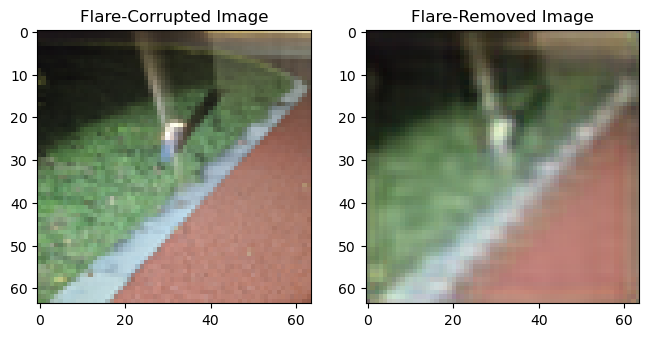

In [5]:
# Load a flare-corrupted image
image_path = r'C:\Users\vickj\Documents\Computer Vision_Sem2_Mtech\NigntFlare_Removal_MIPI\Valid\val_input_2k_bicubic\004403.png'
flare_corrupted_image = Image.open(image_path).resize((64, 64))
flare_corrupted_image = np.array(flare_corrupted_image) / 255.0  # Normalize to [0, 1]
flare_corrupted_image = np.expand_dims(flare_corrupted_image, axis=0)

# Get the flare-removed image prediction
flare_removed_image = model.predict(flare_corrupted_image)

# Display the original, flare-corrupted, and flare-removed images in the notebook
plt.figure(figsize=(12, 4))

# Flare-corrupted image
plt.subplot(1, 3, 2)
plt.imshow(flare_corrupted_image[0])
plt.title('Flare-Corrupted Image')

# Flare-removed image
plt.subplot(1, 3, 3)
plt.imshow(flare_removed_image[0])
plt.title('Flare-Removed Image')

plt.show()


In [15]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928 

In [7]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


import os

# Specify the path to the directory containing validation images
validation_directory = r'C:\Users\vickj\Documents\Computer Vision_Sem2_Mtech\NigntFlare_Removal_MIPI\Valid\val_input_2k_bicubic'

# Get a list of validation image names
validation_image_names = os.listdir(validation_directory)

# Continue with the rest of your code
output_directory = r'C:\Users\vickj\Documents\Computer Vision_Sem2_Mtech\NigntFlare_Removal_MIPI\Output'
os.makedirs(output_directory, exist_ok=True)

# Loop through all validation images
for image_name in validation_image_names:
    # Load a flare-corrupted image
    image_path = os.path.join(r'C:\Users\vickj\Documents\Computer Vision_Sem2_Mtech\NigntFlare_Removal_MIPI\Valid\val_input_2k_bicubic', image_name)
    flare_corrupted_image = Image.open(image_path).resize((64, 64))
    flare_corrupted_image = np.array(flare_corrupted_image) / 255.0  # Normalize to [0, 1]
    flare_corrupted_image = np.expand_dims(flare_corrupted_image, axis=0)

    # Get the flare-removed image prediction
    flare_removed_image = model.predict(flare_corrupted_image)

    # Normalize the flare-removed image to [0, 1]
    flare_removed_image_normalized = (flare_removed_image[0] - flare_removed_image[0].min()) / (flare_removed_image[0].max() - flare_removed_image[0].min())

    # Save the flare-removed image with the same name as the input image in the output directory
    output_image_path = os.path.join(output_directory, f'{image_name}')
    plt.imsave(output_image_path, flare_removed_image_normalized)


1/1 [==============================] - 2s 2s/step
